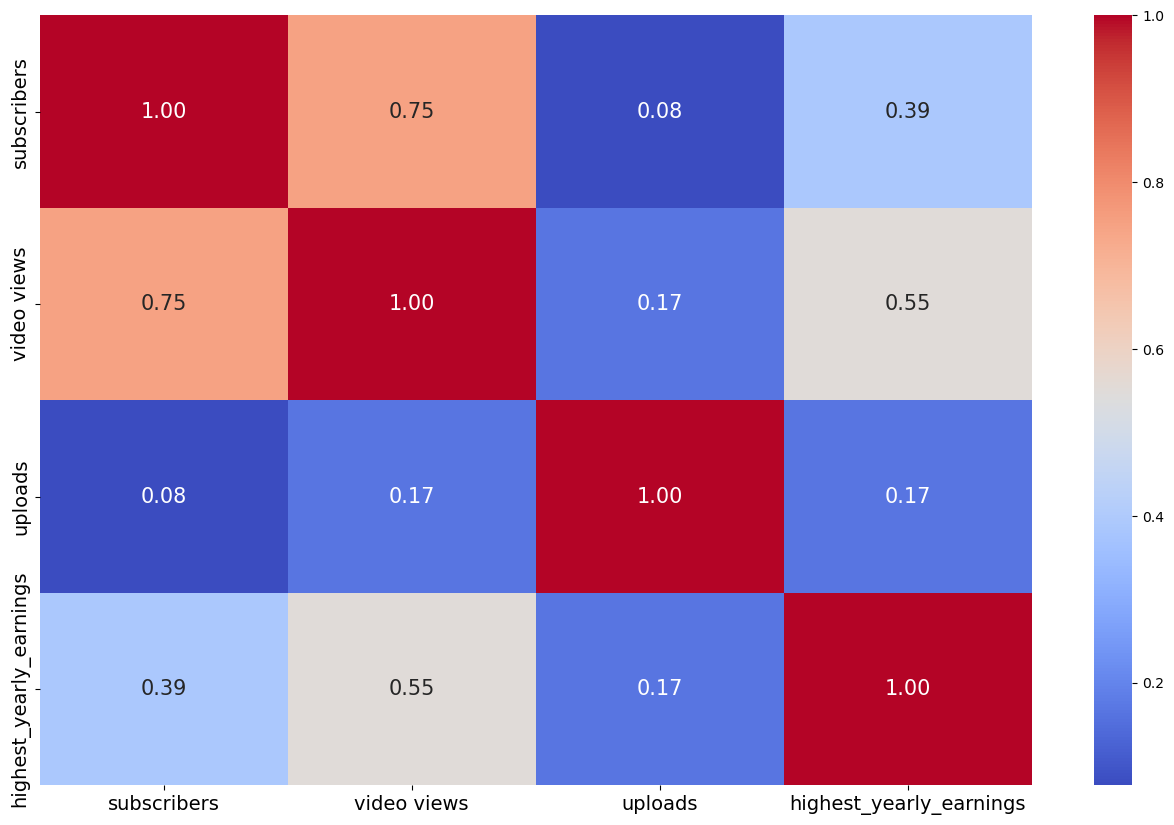

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import seaborn as sns
df = pd.read_csv('Global YouTube Statistics.csv')
df = df.drop(['rank', 'Abbreviation', 'country_rank', 'created_month',
             'created_date', 'Gross tertiary education enrollment (%)', 'Unemployment rate', 'Urban_population', 'channel_type_rank', 'video_views_for_the_last_30_days', 'lowest_monthly_earnings', 'highest_monthly_earnings','lowest_yearly_earnings', 'subscribers_for_last_30_days','created_year','Population','Latitude','Longitude','video_views_rank'], axis=1)
df.describe()
rank_analysis = df[['subscribers', 'video views', 'uploads', 'highest_yearly_earnings']].corr()
correlation_matrix = rank_analysis
plt.figure(figsize=(16,10))
sns.heatmap(rank_analysis, annot=True,cmap='coolwarm', fmt='.2f',annot_kws={'size':15})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [39]:
df.describe()

,subscribers,video views,uploads,highest_yearly_earnings
count,9.950000e+02,9.950000e+02,995.000000,9.950000e+02
mean,2.298241e+07,1.103954e+10,9187.125628,7.081814e+06
std,1.752611e+07,1.411084e+10,34151.352254,1.379704e+07
min,1.230000e+07,0.000000e+00,0.000000,0.000000e+00
25%,1.450000e+07,4.288145e+09,194.500000,5.217500e+05
50%,1.770000e+07,7.760820e+09,729.000000,2.600000e+06
75%,2.460000e+07,1.355470e+10,2667.500000,7.300000e+06
max,2.450000e+08,2.280000e+11,301308.000000,1.634000e+08


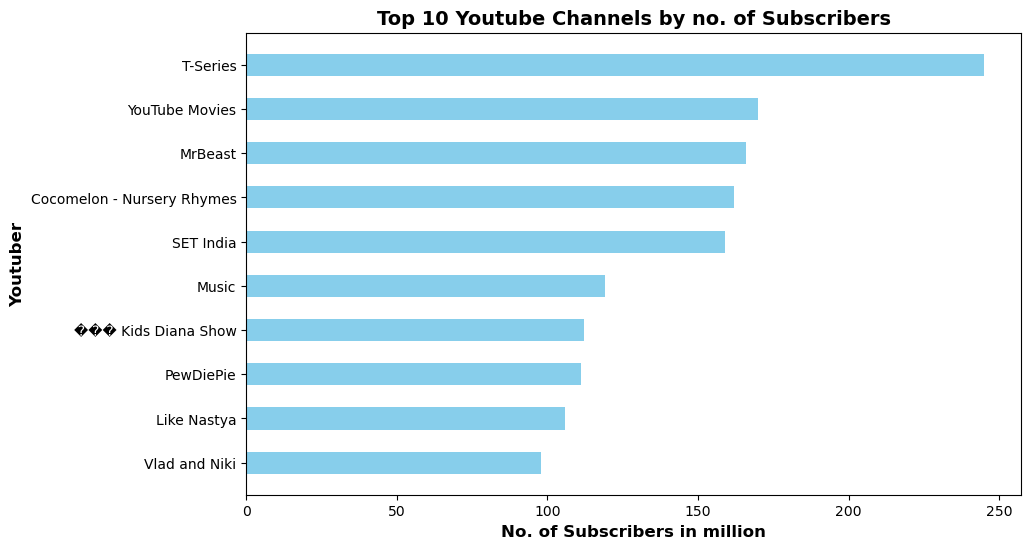

In [41]:
# first select columns
colms= ['Youtuber', 'subscribers']

# to select the top 10 
bar_colms= df.loc[0:9, colms]

bar_colms= bar_colms.sort_values('subscribers', ascending = True)

# to have a better visuality, it would be nice to have our no. in million
bar_colms['subscribers (MM)'] = (bar_colms['subscribers'] / 1000000).astype(int)

bar_colms
x= bar_colms['Youtuber']
y= bar_colms['subscribers (MM)']
 
# Figure Size
fig = plt.figure(figsize =(10, 6))
 
# creating the bar plot
plt.barh(x, y, color= 'skyblue', height= 0.5 )
 
plt.xlabel("No. of Subscribers in million", weight='bold', fontsize = 12)
plt.ylabel("Youtuber", weight='bold', fontsize = 12)
plt.title("Top 10 Youtube Channels by no. of Subscribers", weight='bold', fontsize = 14)
plt.show()

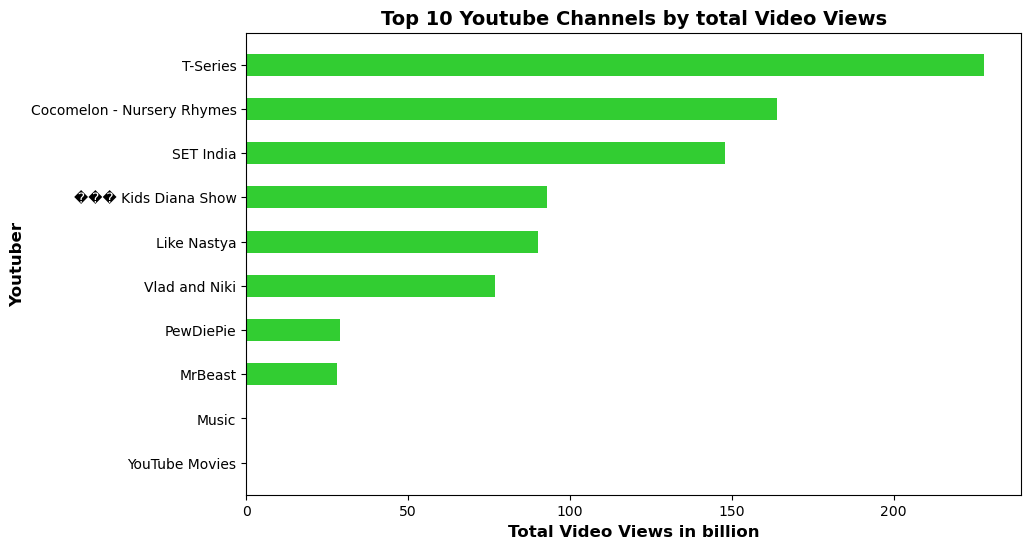

In [43]:
# first select columns
colms= ['Youtuber', 'video views']

# to select the top 10
bar_colms= df.loc[0:9, colms]

bar_colms= bar_colms.sort_values('video views', ascending = True)

# to have a better visuality, it would be nice to have our no. of Video Views in billion
bar_colms['video views (bil)'] = (bar_colms['video views'] / 1000000000).astype(int)

bar_colms
# Ploting 'Top 10 Youtube channels by total Video Views'

x= bar_colms['Youtuber']
y= bar_colms['video views (bil)']
 
# Figure Size
fig = plt.figure(figsize =(10, 6))
 
# creating the bar plot
plt.barh(x, y, color= 'limegreen', height= 0.5 )
 
plt.xlabel("Total Video Views in billion", weight='bold', fontsize = 12)
plt.ylabel("Youtuber", weight='bold', fontsize = 12)
plt.title("Top 10 Youtube Channels by total Video Views", weight='bold', fontsize = 14)
plt.show()

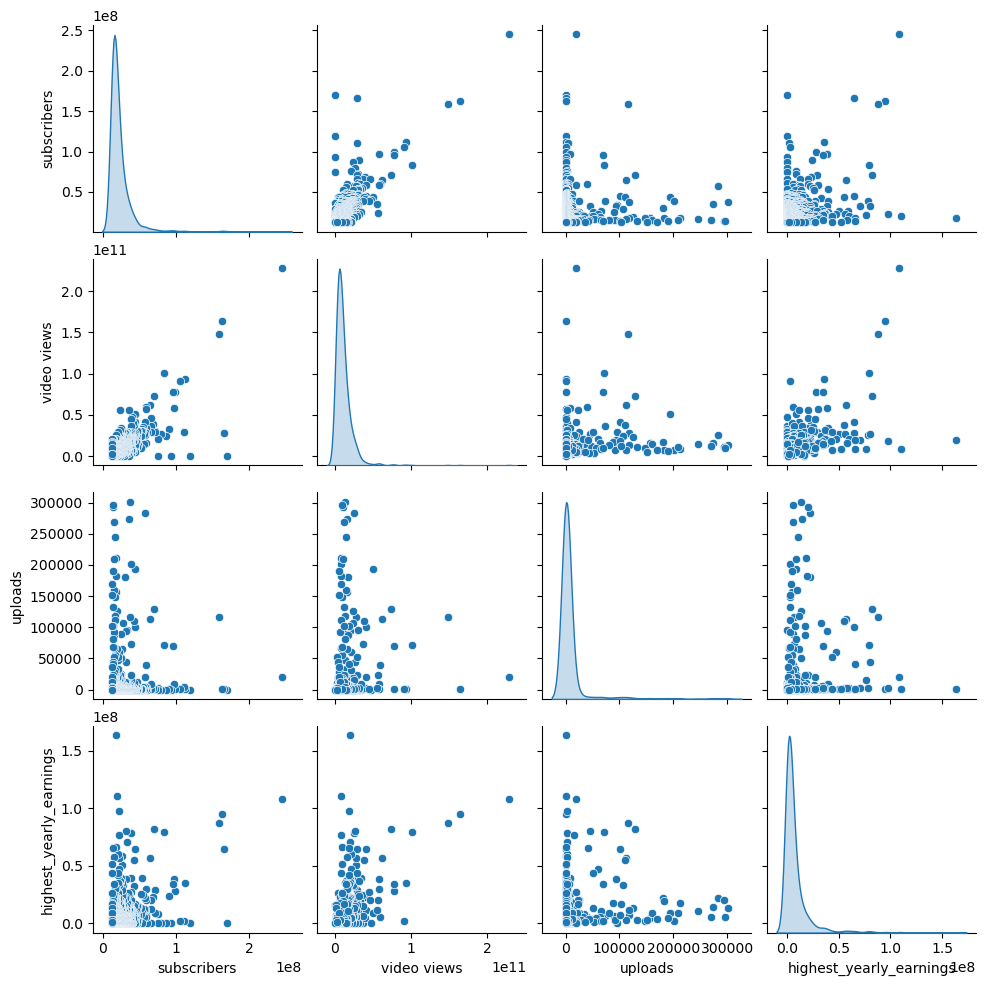

In [45]:
sns.pairplot(df[['subscribers', 'video views', 'uploads', 'highest_yearly_earnings']], diag_kind='kde')
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['video views', 'uploads', 'highest_yearly_earnings']]
y = df['subscribers']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse, r2)
r_squared = r2_score(y_test, y_pred)

# Print R-squared value
print(f"R-squared: {r_squared:.2f}")

69554510165188.87 0.4776732679568053
R-squared: 0.48


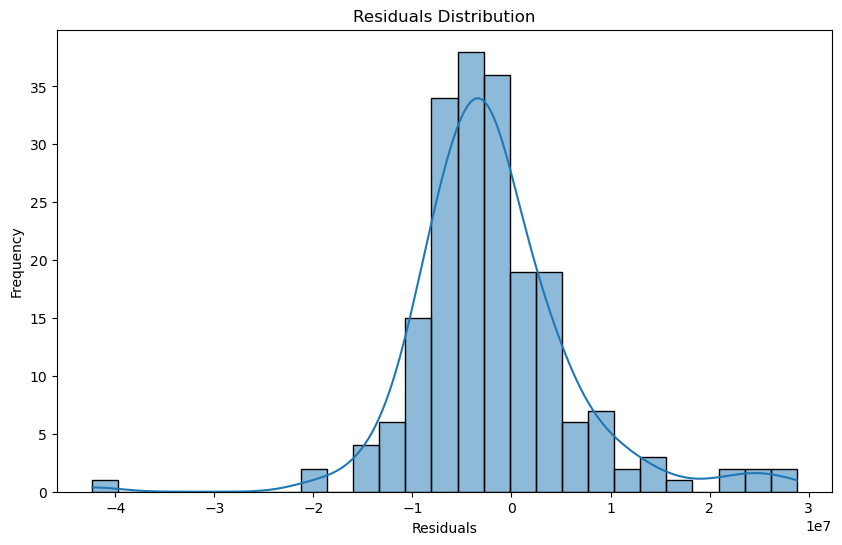

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

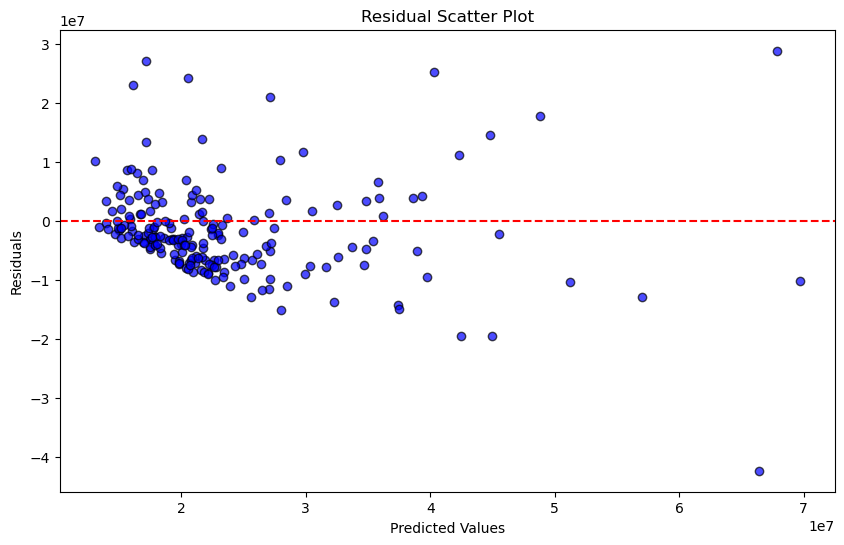

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')  # Zero line to show the baseline
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Scatter Plot")
plt.show()

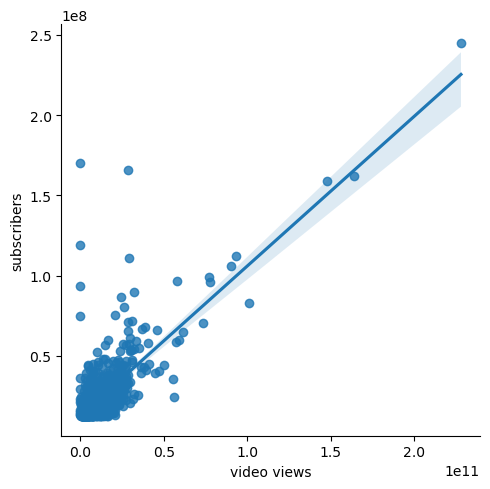

In [49]:
sns.lmplot(x='video views', y='subscribers', data = df)

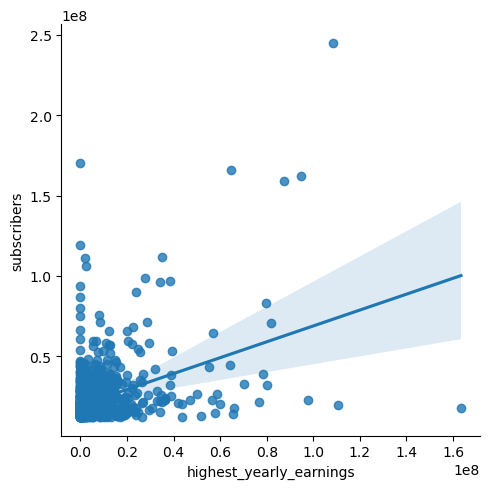

In [50]:
sns.lmplot(x='highest_yearly_earnings', y='subscribers', data = df)

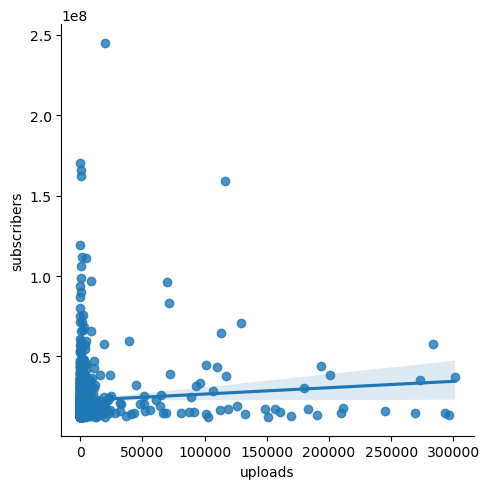

In [51]:
sns.lmplot(x='uploads', y='subscribers', data = df)

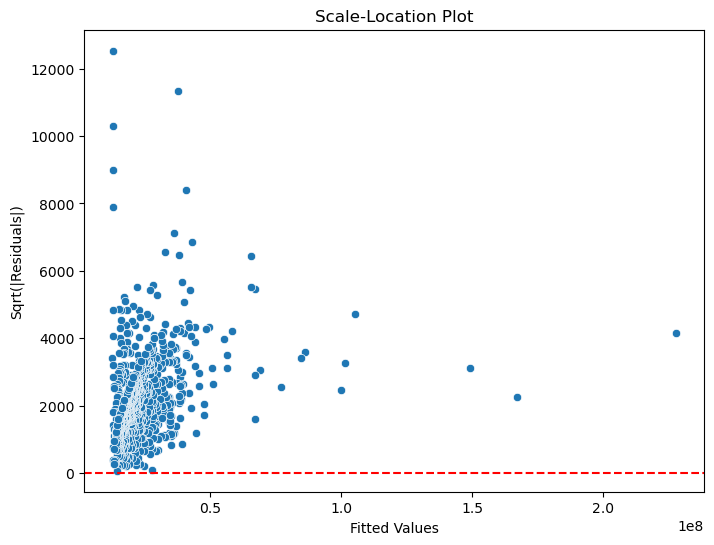

In [52]:
import statsmodels.api as sm

# Add a constant to the independent variables (for the intercept in the regression model)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Get the fitted values (y_hat) and residuals (y - y_hat)
fitted_values = model.fittedvalues
residuals = model.resid

# Standardize residuals (sqrt of absolute residuals)
standardized_residuals = np.sqrt(np.abs(residuals))

# Create the Scale-Location plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_values, y=standardized_residuals)

# Add a horizontal line at y=0 for reference
plt.axhline(y=0, color='red', linestyle='--')

# Label the axes
plt.xlabel('Fitted Values')
plt.ylabel('Sqrt(|Residuals|)')

# Title
plt.title('Scale-Location Plot')

# Show the plot
plt.show()


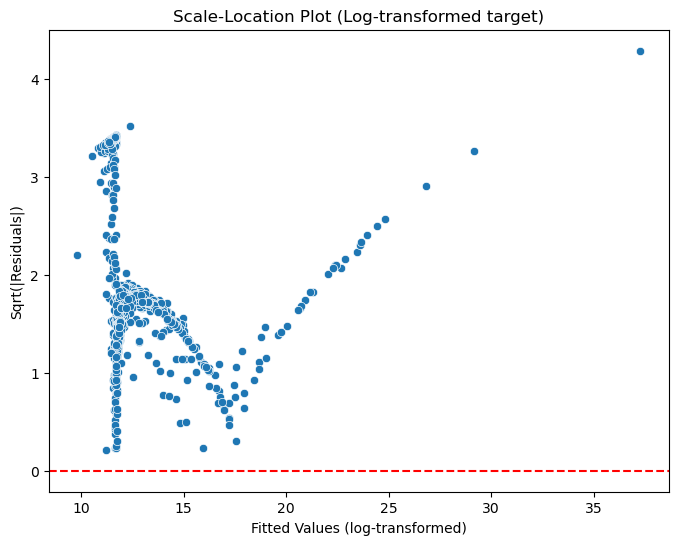

In [53]:
# Apply log transformation to the dependent variable if it's highly skewed
df['log_highest_yearly_earnings'] = np.log(df['highest_yearly_earnings'] + 1)  # Log transform, add 1 for avoiding log(0)

# Redefine the dependent variable and fit the model
y_log = df['log_highest_yearly_earnings']
model_log = sm.OLS(y_log, X).fit()

# Get fitted values and residuals
fitted_values_log = model_log.fittedvalues
residuals_log = model_log.resid
standardized_residuals_log = np.sqrt(np.abs(residuals_log))

# Plot the Scale-Location plot with the log-transformed target variable
plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_values_log, y=standardized_residuals_log)

# Add a horizontal line at y=0
plt.axhline(y=0, color='red', linestyle='--')

# Label axes and title
plt.xlabel('Fitted Values (log-transformed)')
plt.ylabel('Sqrt(|Residuals|)')
plt.title('Scale-Location Plot (Log-transformed target)')

plt.show()


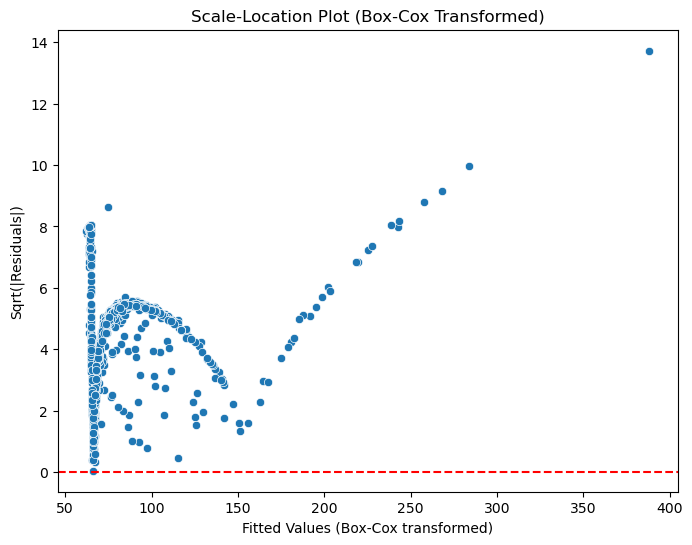

In [54]:
from scipy import stats

# Apply Box-Cox transformation to target variable
y_boxcox, _ = stats.boxcox(df['highest_yearly_earnings'] + 1)  # Add 1 to avoid log(0)

# Fit the model with the transformed target
model_boxcox = sm.OLS(y_boxcox, X).fit()

# Get fitted values and residuals
fitted_values_boxcox = model_boxcox.fittedvalues
residuals_boxcox = model_boxcox.resid
standardized_residuals_boxcox = np.sqrt(np.abs(residuals_boxcox))

# Plot the Scale-Location plot for the Box-Cox transformed model
plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_values_boxcox, y=standardized_residuals_boxcox)

# Add a horizontal line at y=0
plt.axhline(y=0, color='red', linestyle='--')

# Label axes and title
plt.xlabel('Fitted Values (Box-Cox transformed)')
plt.ylabel('Sqrt(|Residuals|)')
plt.title('Scale-Location Plot (Box-Cox Transformed)')

plt.show()


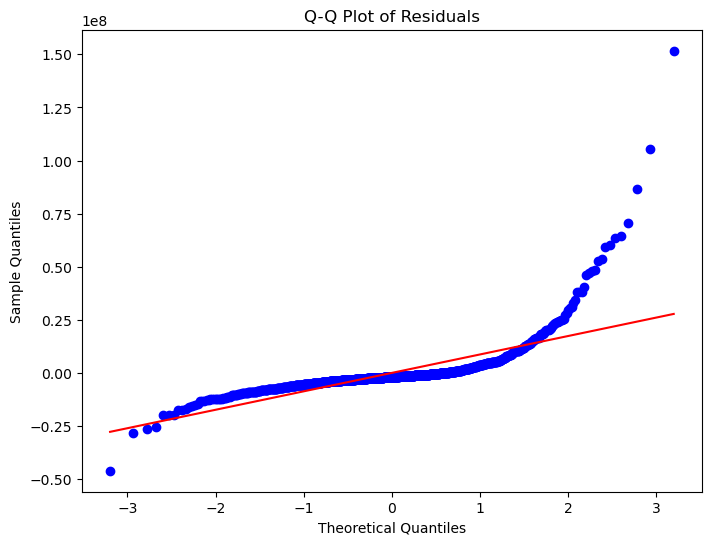

In [55]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming you have the dataframe 'df' already defined

# Select independent variables and dependent variable
X = df[['subscribers', 'video views', 'uploads']]
y = df['highest_yearly_earnings']

# Add constant to the independent variables (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Get the residuals from the model
residuals = model.resid

# Create the Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)

# Title and labels
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Show the plot
plt.show()


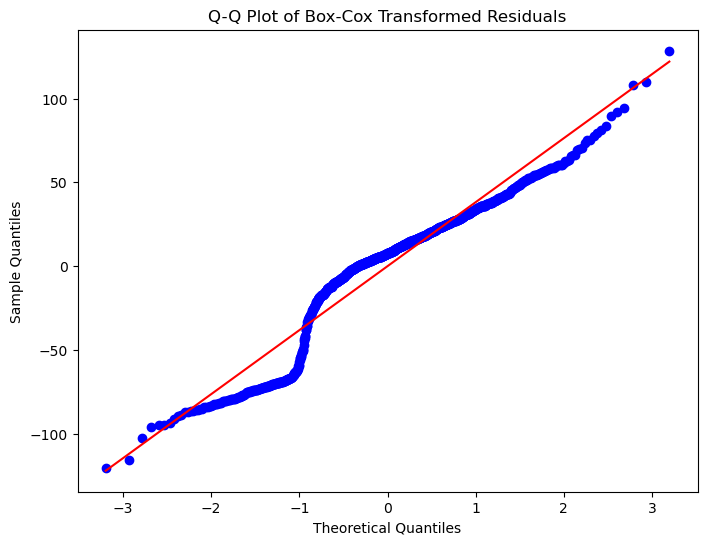

In [56]:
from scipy import stats

# Apply Box-Cox transformation to the dependent variable (add 1 if necessary for values <= 0)
y_boxcox, lambda_boxcox = stats.boxcox(df['highest_yearly_earnings'] + 1)

# Fit the model with the Box-Cox transformed dependent variable
model_boxcox = sm.OLS(y_boxcox, X).fit()

# Get the residuals from the Box-Cox model
residuals_boxcox = model_boxcox.resid

# Create a Q-Q plot for the Box-Cox transformed residuals
plt.figure(figsize=(8, 6))
stats.probplot(residuals_boxcox, dist="norm", plot=plt)

# Title and labels
plt.title('Q-Q Plot of Box-Cox Transformed Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

plt.show()

# Optionally, print the optimal lambda value for the Box-Cox transformation



In [57]:
# Calculate the IQR (Interquartile Range) for each column in your dataset
Q1 = df[['subscribers', 'video views', 'uploads', 'highest_yearly_earnings']].quantile(0.25)
Q3 = df[['subscribers', 'video views', 'uploads', 'highest_yearly_earnings']].quantile(0.75)
IQR = Q3 - Q1

# Identify the outliers (values outside 1.5*IQR)
outliers = ((df[['subscribers', 'video views', 'uploads', 'highest_yearly_earnings']] < (Q1 - 1.5 * IQR)) | 
            (df[['subscribers', 'video views', 'uploads', 'highest_yearly_earnings']] > (Q3 + 1.5 * IQR)))

# Show rows with outliers
outlier_rows = df[outliers.any(axis=1)]
print(outlier_rows)

                       Youtuber  subscribers   video views          category  \
0                      T-Series    245000000  2.280000e+11             Music   
1                YouTube Movies    170000000  0.000000e+00  Film & Animation   
2                       MrBeast    166000000  2.836884e+10     Entertainment   
3    Cocomelon - Nursery Rhymes    162000000  1.640000e+11         Education   
4                     SET India    159000000  1.480000e+11             Shows   
..                          ...          ...           ...               ...   
964              Flowers Comedy     12500000  1.169108e+10     Entertainment   
966           Wave Music Bhakti     12500000  5.146004e+09             Music   
970                    _vector_     12400000  7.597013e+09            Comedy   
979   DaniRep | +6 V�����������     12400000  6.933661e+09            Gaming   
990                Natan por A�     12300000  9.029610e+09            Sports   

                          Title  upload

In [73]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

X = df[['video views', 'uploads', 'highest_yearly_earnings']]
y = df['subscribers']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')


print(f"Cross-validation R-squared scores: {cv_scores}")
print(f"Mean R-squared scores: {cv_scores.mean():.2f}")
print(f"Standard deviation R-squared scores: {cv_scores.std():.2f}")

Cross-validation R-squared scores: [0.59766344 0.66808525 0.48036815 0.81641916 0.22984487]
Mean R-squared scores: 0.56
Standard deviation R-squared scores: 0.20


In [75]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"Mean sqaured error for kNN: {mse_knn:.2f}")
print(f"R-sqaured for kNN: {r2_knn:.2f}")

Mean sqaured error for kNN: 82130866331658.30
R-sqaured for kNN: 0.38


In [77]:
from sklearn.preprocessing import KBinsDiscretizer

kbin = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
y_pred_binned = kbin.fit_transform(y_pred_knn.reshape(-1,1)).flatten()
y_test_binned = kbin.transform(y_test.values.reshape(-1,1)).flatten()
con_matrix = confusion_matrix(y_test_binned, y_pred_binned)
print(con_matrix)

[[162  11   2]
 [  9   9   0]
 [  0   3   3]]


C:\Users\jacqu\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
